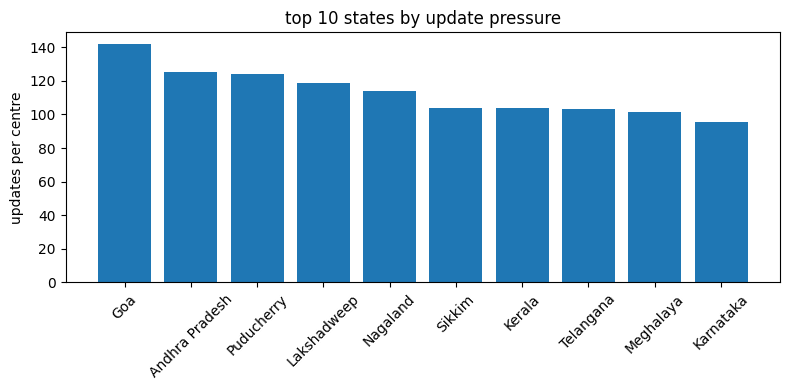

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

demo=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
bio=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")
updates=pd.concat([demo,bio]).groupby("state").size().reset_index(name="updates")

centres=pd.read_csv("../sql/data/Aadhar.csv")
centres=centres.rename(columns={"State":"state","No. of centres":"centres"})
centres["centres"]=pd.to_numeric(centres["centres"],errors="coerce")

df=updates.merge(centres,on="state",how="inner")
df["update_pressure"]=df["updates"]/df["centres"]

df=df.sort_values("update_pressure",ascending=False).head(10)

plt.figure(figsize=(8,4))
plt.bar(df["state"],df["update_pressure"])
plt.xticks(rotation=45)
plt.ylabel("updates per centre")
plt.title("top 10 states by update pressure")
plt.tight_layout()
plt.show()
